# task

### Условие задачи

**Дано:**
- двумерная решетка молекул, расположенных в узлах кристаллической решетки, размеров $L_x \times L_y$ с периодическими границами
- каждая молекула обладает спином +1 или -1
- межмолекулярное взаимодействие описывается константами $J_{ij} = 1$
- модель Изинга


**Требуется:**
- согласно модели Изинга рассчитать нормированное значение средней энергии $\frac{\langle E \rangle}{Lx Ly}$ для указанной решетки молекул при:
    - размерах решетки $L_x \in [2, 3, ..., 8]$, $L_y = 4$
    - температурах $kT \in [1.0, 5.0)$ с шагом $0.1$
- сохранить массив средних энергий при помощи `np.save`
- вывести время расчета каждой итерации по $Lx$ или по $k T$
- отобразить цветовую карту:
    - ось абсцисс - $L_x$,
    - ось ординат - $k T$,
    - цветом отобразить нормированное значение средней энергии $\frac{\langle E \rangle}{Lx Ly}$,
    - подписать оси,
    - отобразить цветовую шкалу (`colorbar`),
    - засечки должны соответствовать значениям $Lx, kT$.
- к каждой функции добавить `docstring` с описанием того, что функция делает, всех параметров и возвращаемого значения    

**Описание:**

**Одномерный случай**

Модель Изинга является моделью магнетика. Пусть этот магнетик состоит из молекул, расположенных в узлах регулярной решетки. Пусть всего таких узлов будет $N$ штук, с индексами $i=1,\ldots, N$.

Предположим, что каждая молекула может быть представлена в виде магнитной стрелки, которая всегда либо направлена вдоль некоторой заданной оси, либо в противоположном направлении. То есть каждая молекула $i$ имеет две конфигурации, которые можно описывать с помощью "спиновой" переменной $\sigma_i$. Эта переменная принимает значение $+1$ (параллельно оси, спин направлен вверх) и $-1$ (антипараллельно оси, спин направлен вниз).

Пусть $\sigma = \{\sigma_1, \sigma_2, \ldots, \sigma_N\}$ обозначает набор значений всех $N$ спинов. Имеется $2^N$ различных наборов $\sigma$, и каждый из них описывает некоторое состояние системы. 

Гамильтониан системы  состоит из двух частей: первая $E_0$ включает вклад межмолекулярных сил внутри магнетика, а вторая $E_1(\sigma)$ вклад от взаимодействий каждого спина с внешним магнитным полем (здесь считается нулевым). 
$$H(\sigma)=E_0(\sigma)+E_1(\sigma)$$

В любой физической системе мы предполагаем все взаимодействия инвариантными по отношению к обращению времени, что означает инвариантность $E$ при изменении знаков всех полей и намагниченностей. Энергия должна быть четной функцией от $\sigma$:
$$E_0(\sigma_1,\ldots, \sigma_N)=E_0(-\sigma_1,\ldots, -\sigma_N)$$

Энергия системы при нулевом внешнем магнитном поле равна сумме произведений **соседних** спинов на константы взаимодействия $J_{ij}$
$$E(\sigma) = -\sum_{i} J_{i,i+1}\sigma_{i}\sigma_{i+1} $$

Вероятность находиться в состоянии $\sigma$
$$P(\sigma)=\frac{e^{-\beta E(\sigma)}}{Z},$$
	где $Z = \sum_{\sigma} e^{-\beta E(\sigma)}-$ статистическая сумма, $\beta = \frac{1}{k T}-$ обратная температура, $k-$ константа Больцмана.
	
Средняя энергия системы 
$$\langle E \rangle = \frac{1}{Z}\sum_{\{\sigma \}} E(\sigma)e^{-\frac{E(\sigma)}{kT}}$$
рассчитывается по всевозможным состояниям системы, т.е. всевозможным наборам $\sigma$.

**Двумерный случай**

В случае двумерной решетки энергия системы при нулевом внешнем магнитном поле вычисляется следующим образом: 
$$E(\sigma) = -\sum_{i,j} J_{ij}(\sigma_{i,j}\sigma_{i+1,j} + \sigma_{i,j}\sigma_{i,j+1})$$


**Проверка корректности результатов**

Нормированное значение средней энергии при температурах $kT \in [1.0, 5.0)$:

- для $L_x=4$

```
 -1.99715844 -1.99396091 -1.98856632 -1.98016965 -1.96786355 -1.95064256
 -1.9274244  -1.89711215 -1.85871667 -1.81153907 -1.75538029 -1.69071311
 -1.61874282 -1.54131149 -1.46065977 -1.37911648 -1.29880759 -1.22145424
 -1.14828469 -1.0800446  -1.01706963 -0.95938399 -0.90679838 -0.85899291
 -0.8155803  -0.77615005 -0.74029707 -0.70763857 -0.67782287 -0.65053286
 -0.62548613 -0.60243323 -0.58115501 -0.56145948 -0.5431787  -0.52616582
 -0.5102923  -0.49544555 -0.48152673 -0.46844889
```

- для $L_x=5$

```
 -1.99715893 -1.99396296 -1.98857263 -1.98018387 -1.96788363 -1.95063964
 -1.92729692 -1.89661121 -1.85735639 -1.80853133 -1.74965024 -1.68103752
 -1.60399878 -1.52075577 -1.43412763 -1.3470633  -1.26219309 -1.18153361
 -1.10638872 -1.03740747 -0.97472647 -0.918132   -0.86720255 -0.82141645
 -0.78022445 -0.74309384 -0.70953215 -0.67909749 -0.65140075 -0.62610332
 -0.60291264 -0.58157686 -0.56187952 -0.54363452 -0.52668165 -0.51088271
 -0.49611811 -0.48228409 -0.46929029 -0.45705774
```

**Материалы:**
- [Бэкстер Р., Вольский Е. П., Дайхин Л. И. Точно решаемые модели в статистической механике](https://yadi.sk/i/2oY4c0bL08pNiw)
- [Пример хорошего `docstring`](https://github.com/numpy/numpy/blob/v1.21.0/numpy/linalg/linalg.py#L313-L395)
- [Зиннуров Б.Д., Якименко В.Я. Магнитные свойства модели Изинга в низких размерностях (МКР)](https://miem.hse.ru/data/2018/05/24/1149431665/model_Izinga_-_Zinnurov_Yakimenko.pdf)


**Правила оценивания:**

- оценка за корректно выполненный расчет для количества молекул в цепочке $L_x$, баллов из 100:
```
    Lx    =   2,   3,   4,   5,    6,    7,     8
    g(Lx) = 1.0, 1.8, 3.3, 6.4, 12.6, 24.9,  50.0
```
    
- штрафы $p(i)$, баллов:
    - не выведено время расчета - 20
    - не выведены значения средней энергии - 20
    - не построена карта - 20
    - отсутствует `docstring` - 20
    - менее значимые недоработки - 10


- итоговая оценка за задание = $\sum_{Lx=2}^{8}{g(Lx)} - \sum_{i}{p(i)}$


In [1]:
from itertools import product
from math import exp
import numpy as np
from numba import njit, prange
from matplotlib import pyplot as plt
from tqdm import trange
import time

# Два решения

Ниже будет представлено два решения: быстрое и медленное
1. В быстром двумерная задача сводится к одномерной, и решается через битовый сдвиг.
2. В медленном для столцов используется product, а строки вычисляются как одномерная задача через битовый сдвиг

Сначала я попробовал решить через "медленное" решение. Получилось слишком медленно. Поэтому написал "быстрое"

# Быстрое решение

In [2]:
@njit(parallel=True)
def calculate_energy_1d(sigma_array: np.array) -> int:
    """
    Функция для вычисления энергии в одномерном массиве

    Parameters
    ----------
    sigma_array : одномерный массив из 1 и -1

    Returns
    -------
    Возвращает энергию для данного массива
    """
    E = 0
    for i in prange(-1, len(sigma_array) - 1):
        E -= sigma_array[i] * sigma_array[(i + 1)]
    return E

@njit
def calculate_energy_2d(sigma_array: np.ndarray) -> int:
    """
    Функция для вычисления энергии в двумерном массиве

    Parameters
    ----------
    sigma_array : двумерный массив из 1 и -1

    Returns
    -------
    Возвращает энергию для данного массива
    """

    # проверяем граничные случаи
    # если на вход попадает одномерный массив, а не двумерная матрица, то сводим задачу к одномерной задаче и вызываем calculate_energy_1d для одномерного массива
    if len(sigma_array) == 1:
        return calculate_energy_1d(sigma_array[0])
    if len(sigma_array[0]) == 1:
        transpose_array = np.empty(len(sigma_array))
        for i in range(len(sigma_array)):
            transpose_array[i] = sigma_array[i][0]
        return calculate_energy_1d(transpose_array)

    E = 0
    for i in range(-1, len(sigma_array) - 1):
        for j in range(-1, len(sigma_array[0]) - 1):
            E -= sigma_array[i][j] * sigma_array[i + 1][j] + sigma_array[i][j] * sigma_array[i][j + 1]
    return E

In [3]:
@njit
def generate_sigma_1d(number: int, L: int) -> np.ndarray:
    """
    Функция, для создания массива с сигмами из целого числа с помощью битового сдвига

    Parameters
    ----------
    number : целое число, по которому будет строиться вектор сигм
    L : длина массива с сигмами

    Returns
    -------
    Вектор
    """
    res = np.empty(L, dtype=np.int8)
    for i in range(L):
        res[i] = (number & 1) * 2 - 1
        number = number >> 1
    return res

In [8]:
@njit(parallel=True)
def mean_energy_with_T_list(Lx: int, Ly: int, T_list: np.array) -> np.array:
    """
    Функция для вычисления средней энергии при фиксиованных длинах и различных температурах

    Parameters
    ----------
    Lx : длина матрицы со спинами по оси x
    Ly : длина матрицы со спинами по оси y
    T_list : массив из температур

    Returns
    -------
    Массив из значений нормированной средней энергии
    """
    E_mean_list = np.zeros(len(T_list), dtype=float)
    Z_mean_list = np.zeros(len(T_list), dtype=float)
    for number in prange(2**(Lx*Ly)): # решаем двумерную задачу через одномерную
        sigma_array = generate_sigma_1d(number, Lx*Ly) # создаем одномерный массив из 1 и -1
        sigma_matrix = sigma_array.reshape(Ly, Lx) # превращаем его в матрицу
        E = calculate_energy_2d(sigma_matrix) # считаем энергию
        e = np.exp(-E / T_list)
        E_mean_list += E * e
        Z_mean_list += e
    E_mean_list /= Z_mean_list
    E_mean_list /= (Lx * Ly)
    return E_mean_list

In [9]:
def calculate_energy_for_different_T_and_Lx(Lx_list, Ly, T_list):
    """
    Основная функция, для вычисления энергии для различной длины и различной температур. Полученные данные сохраняет в файл.

    Parameters
    ----------
    Lx_list : массив из длин по оси x
    Ly : длина по оси y
    T_list : массив температур
    """
    meanEnergyList = np.empty((len(Lx_list), len(T_list)), dtype=float)
    for i in range(len(Lx_list)):
        start = time.time()
        meanEnergyList[i] = mean_energy_with_T_list(Lx_list[i], Ly, np.array(T_list))
        end = time.time()
        print(f"time for Lx={Lx_list[i]} for T=[{T_list[0]}, {T_list[-1]}] with step=0.1: ", end - start)

    with open(f'file.npy', 'wb') as file:
        np.save(file, np.transpose(meanEnergyList))

In [17]:
# задачем данные
Lx_list = [*range(2, 9)]
Ly = 4
T_list = [n / 10.0 for n in range(1 * 10, 5 * 10)]

calculate_energy_for_different_T_and_Lx(Lx_list, Ly, T_list)

time for Lx=2 for T=[1.0, 4.9] with step=0.1:  0.0009360313415527344
time for Lx=3 for T=[1.0, 4.9] with step=0.1:  0.0007631778717041016
time for Lx=4 for T=[1.0, 4.9] with step=0.1:  0.0038509368896484375
time for Lx=5 for T=[1.0, 4.9] with step=0.1:  0.05668210983276367
time for Lx=6 for T=[1.0, 4.9] with step=0.1:  1.0574688911437988
time for Lx=7 for T=[1.0, 4.9] with step=0.1:  14.751298189163208
time for Lx=8 for T=[1.0, 4.9] with step=0.1:  276.4063868522644


In [27]:
# сверимся с тесткейсом

with open(f'file.npy', 'rb') as file:
    meanEnergy = np.transpose(np.load(file))
    print(meanEnergy[2])

print()

with open(f'file.npy', 'rb') as file:
    meanEnergy = np.transpose(np.load(file))
    print(meanEnergy[3])

[-1.99715844 -1.99396091 -1.98856632 -1.98016965 -1.96786355 -1.95064256
 -1.9274244  -1.89711215 -1.85871667 -1.81153907 -1.75538029 -1.69071311
 -1.61874282 -1.54131149 -1.46065977 -1.37911648 -1.29880759 -1.22145424
 -1.14828469 -1.0800446  -1.01706963 -0.95938399 -0.90679838 -0.85899291
 -0.8155803  -0.77615005 -0.74029707 -0.70763857 -0.67782287 -0.65053286
 -0.62548613 -0.60243323 -0.58115501 -0.56145948 -0.5431787  -0.52616582
 -0.5102923  -0.49544555 -0.48152673 -0.46844889]

[-1.99715893 -1.99396296 -1.98857263 -1.98018387 -1.96788363 -1.95063964
 -1.92729692 -1.89661121 -1.85735639 -1.80853133 -1.74965024 -1.68103752
 -1.60399878 -1.52075577 -1.43412763 -1.3470633  -1.26219309 -1.18153361
 -1.10638872 -1.03740747 -0.97472647 -0.918132   -0.86720255 -0.82141645
 -0.78022445 -0.74309384 -0.70953215 -0.67909749 -0.65140075 -0.62610332
 -0.60291264 -0.58157686 -0.56187952 -0.54363452 -0.52668165 -0.51088271
 -0.49611811 -0.48228409 -0.46929029 -0.45705774]


- для $L_x=4$

```
 -1.99715844 -1.99396091 -1.98856632 -1.98016965 -1.96786355 -1.95064256
 -1.9274244  -1.89711215 -1.85871667 -1.81153907 -1.75538029 -1.69071311
 -1.61874282 -1.54131149 -1.46065977 -1.37911648 -1.29880759 -1.22145424
 -1.14828469 -1.0800446  -1.01706963 -0.95938399 -0.90679838 -0.85899291
 -0.8155803  -0.77615005 -0.74029707 -0.70763857 -0.67782287 -0.65053286
 -0.62548613 -0.60243323 -0.58115501 -0.56145948 -0.5431787  -0.52616582
 -0.5102923  -0.49544555 -0.48152673 -0.46844889
```

- для $L_x=5$

```
 -1.99715893 -1.99396296 -1.98857263 -1.98018387 -1.96788363 -1.95063964
 -1.92729692 -1.89661121 -1.85735639 -1.80853133 -1.74965024 -1.68103752
 -1.60399878 -1.52075577 -1.43412763 -1.3470633  -1.26219309 -1.18153361
 -1.10638872 -1.03740747 -0.97472647 -0.918132   -0.86720255 -0.82141645
 -0.78022445 -0.74309384 -0.70953215 -0.67909749 -0.65140075 -0.62610332
 -0.60291264 -0.58157686 -0.56187952 -0.54363452 -0.52668165 -0.51088271
 -0.49611811 -0.48228409 -0.46929029 -0.45705774
```

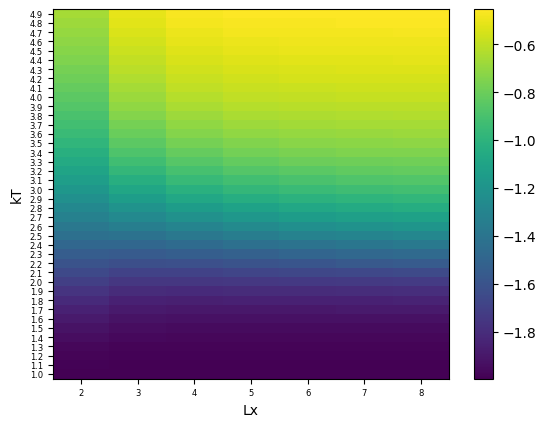

In [32]:
with open(f'file.npy', 'rb') as file:
    meanEnergy = np.load(file)
    plt.pcolormesh(Lx_list, T_list, meanEnergy)
    plt.xlabel('Lx')
    plt.ylabel('kT')
    plt.xticks(Lx_list, fontsize=6)
    plt.yticks(T_list, fontsize=6)
    plt.colorbar()
    plt.show()

# Медленное решения

Данное решение оказалось слишком медленным

In [38]:
@njit
def calculate_energy_1d(sigma_array: np.ndarray) -> int:
    """
    Функция для вычисления энергии в одномерном массиве

    Parameters
    ----------
    sigma_array : одномерный массив из 1 и -1

    Returns
    -------
    Возвращает энергию для данного массива
    """
    E = 0
    for i in range(len(sigma_array)):
        E -= sigma_array[i] * sigma_array[(i + 1) % n]
    return E


def calculate_energy_2d(sigma_array: np.ndarray) -> int:
    """
    Функция для вычисления энергии в двумерном массиве

    Parameters
    ----------
    sigma_array : двумерный массив из 1 и -1

    Returns
    -------
    Возвращает энергию для данного массива
    """
    E = 0
    if len(sigma_array) == 1:
        return calculate_energy_1d(sigma_array[0])
    if len(sigma_array[0]) == 1:
        return calculate_energy_1d(np.transpose(sigma_array))
    for i in range(-1, len(sigma_array) - 1):
        for j in range(-1, len(sigma_array[0]) - 1):
            E -= sigma_array[i][j] * sigma_array[i + 1][j] + sigma_array[i][j] * sigma_array[i][j + 1]
    return E

In [39]:
@njit
def generate_sigma_1d(number: int, L: int) -> np.ndarray:
    """
    Функция, для создания массива с сигмами из целого числа с помощью битового сдвига

    Parameters
    ----------
    number : целое число, по которому будет строиться вектор сигм
    L : длина массива с сигмами

    Returns
    -------
    Вектор
    """
    res = np.empty(L, dtype=np.int8)
    for i in range(L):
        res[i] = (number & 1) * 2 - 1
        number = number >> 1
    return res


# def generate_matrix(Lx: int, Ly: int) -> np.ndarray:
#     result = []
#     for vector_with_numbers in product([*range(0, 2 ** Lx)], repeat=Ly):
#         matrix = np.empty((Ly, Lx), dtype=np.int8)
#         for i in range(len(vector_with_numbers)):
#             number = vector_with_numbers[i]
#             matrix[i] = generate_sigma_1d(number, Lx)
#         result.append(matrix)
#     return result

In [40]:
def mean_energy(Lx: int, Ly: int, kT: float) -> float:
    """
    Функция для вычисления средней энергии

    Parameters
    ----------
    kT : температура
    Lx : длина матрицы со спинами по оси x
    Ly : длина матрицы со спинами по оси y

    Returns
    -------
    Значение нормированной средней энергии
    """
    E_mean = 0
    Z = 0
    # matrixes = generate_matrix(Lx, Ly)
    result = []
    for vector_with_numbers in product([*range(0, 2 ** Lx)], repeat=Ly):
        matrix = np.empty((Ly, Lx), dtype=np.int8)
        for i in range(len(vector_with_numbers)):
            number = vector_with_numbers[i]
            matrix[i] = generate_sigma_1d(number, Lx)
        E = calculate_energy_2d(matrix)
        e = exp(-E / kT)
        E_mean += E * e
        Z += e
    E_mean /= Z
    return E_mean / (Lx * Ly)

In [44]:
Lx_list = [*range(2, 9)]
Ly = 4
T_list = [n / 10.0 for n in range(1 * 10, 5 * 10)]
Lx_list = Lx_list[:3]
T_list = T_list[:]

meanEnergyList = np.empty((len(T_list), len(Lx_list)), dtype=float)
for i in range(len(Lx_list)):
    Lx = Lx_list[i]
    for j in trange(len(T_list)):
        T = T_list[j]
        meanEnergy = mean_energy(Lx, Ly, T)
        meanEnergyList[j][i] = meanEnergy

with open(f'file.npy', 'wb') as file:
    np.save(file, meanEnergyList)

100%|██████████| 40/40 [00:41<00:00,  1.05s/it]


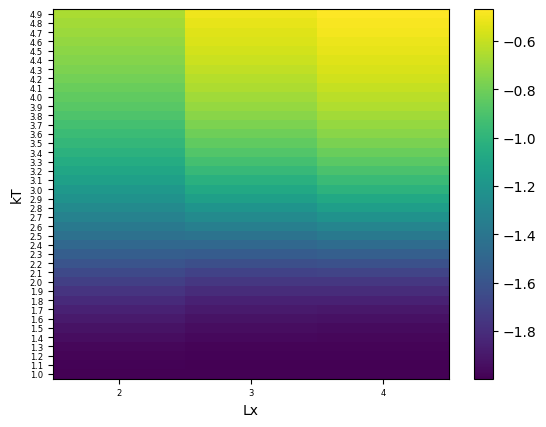

In [54]:
with open(f'file.npy', 'rb') as file:
    meanEnergy = np.load(file)
    plt.pcolormesh(Lx_list, T_list, meanEnergy)
    plt.xlabel('Lx')
    plt.ylabel('kT')
    plt.xticks(Lx_list, fontsize=6)
    plt.yticks(T_list, fontsize=6)
    plt.colorbar()
    plt.show()